In [2]:
import pandas as pd
import numpy as np

path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\marketplace_data.csv"
df = pd.read_csv(path)

category_avg = df.groupby('category')['price'].mean()
category_median = df.groupby('category')['price'].median()
category_count = df['category'].value_counts()
brand_count = df['brand'].value_counts()

df['category_avg_price'] = df['category'].map(category_avg)
df['category_median_price'] = df['category'].map(category_median)
df['price_deviation_from_category'] = df['price'] - df['category_avg_price']
df['price_percentile_in_category'] = df.groupby('category')['price'].rank(pct=True)

df['brand_trend_score'] = df['brand'].map(brand_count).fillna(1)
df['category_trend_score'] = df['category'].map(category_count)

df['demand_score'] = df['category_trend_score'] * df['rating']
df['estimated_time_to_sell'] = 30 / (df['demand_score'] + 1)

df['predicted_market_price'] = df['category_avg_price']
df['pricing_gap'] = df['predicted_market_price'] - df['price']

df['platform_fee_estimate'] = df['predicted_market_price'] * 0.08
df['expected_resale_profit'] = df['predicted_market_price'] - df['price'] - df['platform_fee_estimate']

df.to_csv(r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\feature_engineered_data.csv", index=False)

df.head()


,title,brand,category,price,rating,stock,category_avg_price,category_median_price,price_deviation_from_category,price_percentile_in_category,brand_trend_score,category_trend_score,demand_score,estimated_time_to_sell,predicted_market_price,pricing_gap,platform_fee_estimate,expected_resale_profit
0,Essence Mascara Lash Princess,Essence,beauty,9.99,2.56,99,13.39,12.99,-3.4,0.4,1.0,5,12.8,2.173913,13.39,3.4,1.0712,2.3288
1,Eyeshadow Palette with Mirror,Glamour Beauty,beauty,19.99,2.86,34,13.39,12.99,6.6,1.0,1.0,5,14.3,1.960784,13.39,-6.6,1.0712,-7.6712
2,Powder Canister,Velvet Touch,beauty,14.99,4.64,89,13.39,12.99,1.6,0.8,1.0,5,23.2,1.239669,13.39,-1.6,1.0712,-2.6712
3,Red Lipstick,Chic Cosmetics,beauty,12.99,4.36,91,13.39,12.99,-0.4,0.6,1.0,5,21.8,1.315789,13.39,0.4,1.0712,-0.6712
4,Red Nail Polish,Nail Couture,beauty,8.99,4.32,79,13.39,12.99,-4.4,0.2,1.0,5,21.6,1.327434,13.39,4.4,1.0712,3.3288


# Feature Engineering for Pricing Intelligence & Deal Detection
New features are engineered to strengthen pricing fairness evaluation and deal detection capabilities. Category-level statistics such as average and median price provide a contextual benchmark for fair pricing. Price deviation and percentile features help identify whether an item is underpriced or overpriced within its category. Trend-based features capture brand and category popularity to reflect changing market demand. A demand score is derived to approximate how quickly an item may sell in the marketplace. This demand signal is used to estimate time-to-sell for resale decisions. Pricing gap and predicted market price support real-time deal alert generation. Flip profit estimation accounts for expected resale value and platform fees. These engineered features collectively enable pricing intelligence, deal alerts, and resale profitability analysis. The feature set remains balanced, interpretable, and suitable for machine learning models.

In [3]:
import pandas as pd

path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\feature_engineered_data.csv"
df = pd.read_csv(path)


In [4]:
df.isnull().sum()

title                             0
brand                            92
category                          0
price                             0
rating                            0
stock                             0
category_avg_price                0
category_median_price             0
price_deviation_from_category     0
price_percentile_in_category      0
brand_trend_score                 0
category_trend_score              0
demand_score                      0
estimated_time_to_sell            0
predicted_market_price            0
pricing_gap                       0
platform_fee_estimate             0
expected_resale_profit            0
dtype: int64

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\feature_engineered_data.csv"
df = pd.read_csv(path)


In [6]:
df = df[df['price'].notnull()]

In [7]:
mean_price = df['price'].mean()
pred_mean = np.full(len(df), mean_price)
rmse_mean = np.sqrt(mean_squared_error(df['price'], pred_mean))
rmse_mean


np.float64(5495.276360693877)

In [8]:
median_price = df['price'].median()
pred_median = np.full(len(df), median_price)
rmse_median = np.sqrt(mean_squared_error(df['price'], pred_median))
rmse_median

np.float64(5705.666819487447)

In [9]:
mode_price = df['price'].mode()[0]
pred_mode = np.full(len(df), mode_price)
rmse_mode = np.sqrt(mean_squared_error(df['price'], pred_mode))
rmse_mode

np.float64(5709.720854962871)

In [10]:
rmse_mean, rmse_median, rmse_mode

(np.float64(5495.276360693877),
 np.float64(5705.666819487447),
 np.float64(5709.720854962871))

In [11]:
df['rating'] = df['rating'].fillna(df['rating'].median())

In [12]:
import pandas as pd

path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\feature_engineered_data.csv"
df = pd.read_csv(path)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

df_encoded.shape


(194, 293)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('price')

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded[numerical_cols].describe()


,rating,stock,category_avg_price,category_median_price,price_deviation_from_category,price_percentile_in_category,brand_trend_score,category_trend_score,demand_score,estimated_time_to_sell,predicted_market_price,pricing_gap,platform_fee_estimate,expected_resale_profit
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,9.339608e-16,9.156479e-17,1.831296e-17,1.831296e-17,-3.204767e-17,-1.831296e-17,-1.098777e-16,7.325183e-17,7.325183e-17,-9.156479e-17,1.831296e-17,3.204767e-17,-1.831296e-17,4.578239e-17
std,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00
min,-1.768269e+00,-1.650036e+00,-2.988018e-01,-2.902130e-01,-4.804334e+00,-1.822568e+00,-4.202821e-01,-1.131088e+00,-1.113242e+00,-1.094462e+00,-2.988018e-01,-5.647617e+00,-2.988018e-01,-5.710769e+00
25%,-8.468097e-01,-8.316827e-01,-2.964677e-01,-2.890100e-01,-1.171602e-02,-7.936028e-01,-4.202821e-01,-9.339354e-01,-8.968505e-01,-8.926620e-01,-2.964677e-01,-4.494377e-03,-2.964677e-01,6.572820e-02
50%,8.840282e-02,5.213836e-02,-2.941187e-01,-2.854010e-01,-2.086377e-03,1.324660e-01,-4.202821e-01,-4.674758e-02,-1.640919e-01,-5.285540e-01,-2.941187e-01,2.086377e-03,-2.941187e-01,7.431238e-02
75%,8.551395e-01,9.359595e-01,-2.186847e-01,-2.354306e-01,4.494377e-03,8.270177e-01,-1.290866e-01,1.234746e+00,7.368030e-01,7.984891e-01,-2.186847e-01,1.171602e-02,-2.186847e-01,8.021567e-02
max,1.642506e+00,1.623376e+00,5.658484e+00,5.631468e+00,5.647617e+00,1.521569e+00,3.365259e+00,1.530475e+00,2.230645e+00,2.658175e+00,5.658484e+00,4.804334e+00,5.658484e+00,4.355585e+00


In [14]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('price')

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded[numerical_cols].describe()


,rating,stock,category_avg_price,category_median_price,price_deviation_from_category,price_percentile_in_category,brand_trend_score,category_trend_score,demand_score,estimated_time_to_sell,predicted_market_price,pricing_gap,platform_fee_estimate,expected_resale_profit
count,1.940000e+02,1.940000e+02,1.940000e+02,194.000000,1.940000e+02,194.000000,1.940000e+02,194.000000,194.000000,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,194.000000
mean,5.493887e-17,4.578239e-17,1.831296e-17,0.000000,-4.578239e-18,0.000000,9.156479e-17,0.000000,0.000000,-1.831296e-17,1.831296e-17,4.578239e-18,1.831296e-17,0.000000
std,1.002587e+00,1.002587e+00,1.002587e+00,1.002587,1.002587e+00,1.002587,1.002587e+00,1.002587,1.002587,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587
min,-1.768269e+00,-1.650036e+00,-2.988018e-01,-0.290213,-4.804334e+00,-1.822568,-4.202821e-01,-1.131088,-1.113242,-1.094462e+00,-2.988018e-01,-5.647617e+00,-2.988018e-01,-5.710769
25%,-8.468097e-01,-8.316827e-01,-2.964677e-01,-0.289010,-1.171602e-02,-0.793603,-4.202821e-01,-0.933935,-0.896850,-8.926620e-01,-2.964677e-01,-4.494377e-03,-2.964677e-01,0.065728
50%,8.840282e-02,5.213836e-02,-2.941187e-01,-0.285401,-2.086377e-03,0.132466,-4.202821e-01,-0.046748,-0.164092,-5.285540e-01,-2.941187e-01,2.086377e-03,-2.941187e-01,0.074312
75%,8.551395e-01,9.359595e-01,-2.186847e-01,-0.235431,4.494377e-03,0.827018,-1.290866e-01,1.234746,0.736803,7.984891e-01,-2.186847e-01,1.171602e-02,-2.186847e-01,0.080216
max,1.642506e+00,1.623376e+00,5.658484e+00,5.631468,5.647617e+00,1.521569,3.365259e+00,1.530475,2.230645,2.658175e+00,5.658484e+00,4.804334e+00,5.658484e+00,4.355585


## After Cleaning the Data

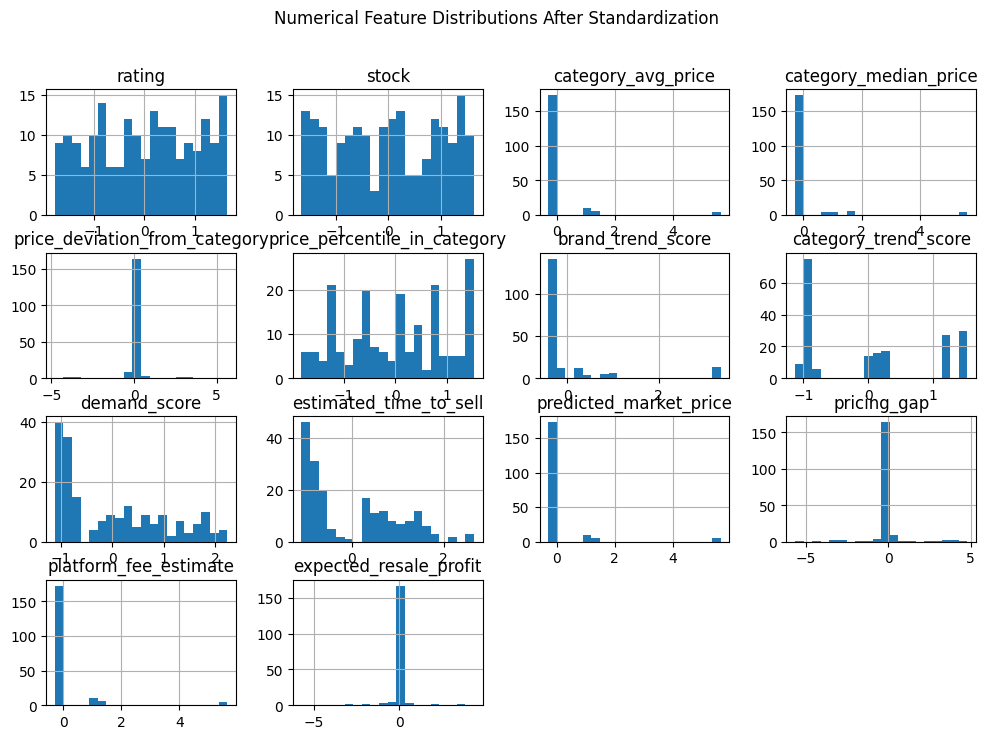

In [15]:
import matplotlib.pyplot as plt

df_encoded.select_dtypes(include=['int64','float64']).drop('price', axis=1).hist(bins=20, figsize=(12,8))
plt.suptitle("Numerical Feature Distributions After Standardization")
plt.show()


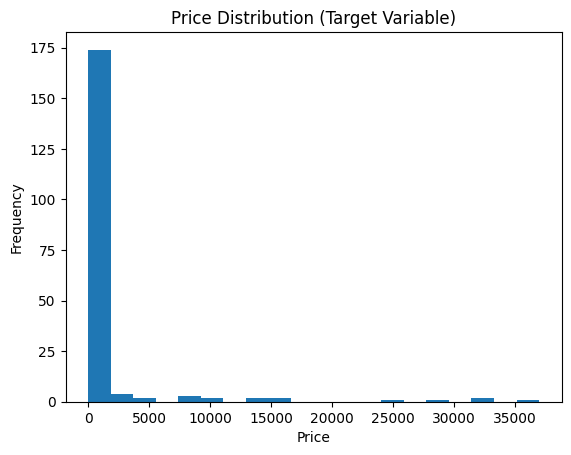

In [16]:
plt.hist(df_encoded['price'], bins=20)
plt.title("Price Distribution (Target Variable)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


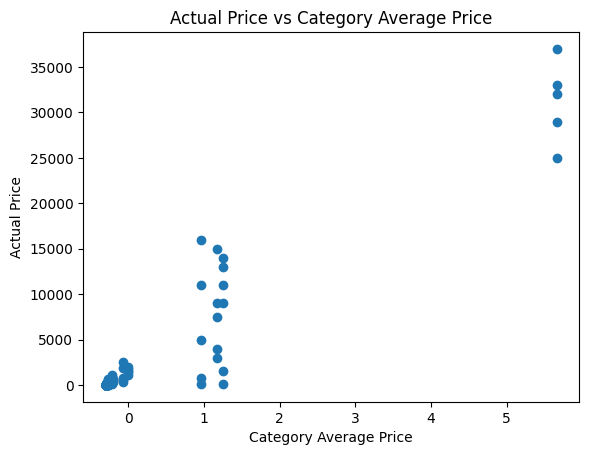

In [17]:
plt.scatter(df_encoded['category_avg_price'], df_encoded['price'])
plt.xlabel("Category Average Price")
plt.ylabel("Actual Price")
plt.title("Actual Price vs Category Average Price")
plt.show()


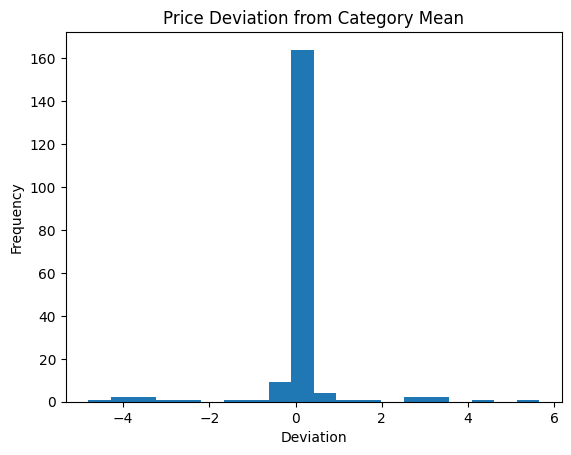

In [18]:
plt.hist(df_encoded['price_deviation_from_category'], bins=20)
plt.title("Price Deviation from Category Mean")
plt.xlabel("Deviation")
plt.ylabel("Frequency")
plt.show()


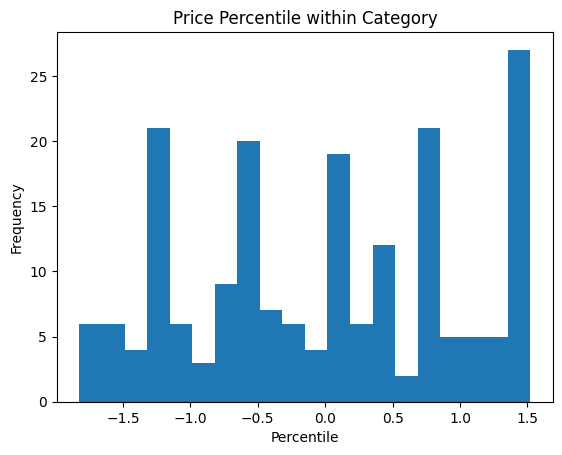

In [19]:
plt.hist(df_encoded['price_percentile_in_category'], bins=20)
plt.title("Price Percentile within Category")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.show()


After cleaning the data


In [20]:
save_path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\final_prepared_dataset.csv"

df_encoded.to_csv(save_path, index=False)

save_path


'C:\\Users\\HP\\OneDrive\\Desktop\\ml hackthon project\\final_prepared_dataset.csv'

In [21]:
import pandas as pd

base_path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\\"

X_train = pd.read_csv(base_path + "X_train.csv")
X_test = pd.read_csv(base_path + "X_test.csv")
y_train = pd.read_csv(base_path + "y_train.csv").squeeze()
y_test = pd.read_csv(base_path + "y_test.csv").squeeze()


In [22]:
import pandas as pd

base_path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\\"

X_train = pd.read_csv(base_path + "X_train.csv")
X_test = pd.read_csv(base_path + "X_test.csv")
y_train = pd.read_csv(base_path + "y_train.csv").squeeze()
y_test = pd.read_csv(base_path + "y_test.csv").squeeze()

text_cols = X_train.select_dtypes(include=['object']).columns

X_train = X_train.drop(columns=text_cols)
X_test = X_test.drop(columns=text_cols)

X_train.shape, X_test.shape


((155, 2), (39, 2))

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}

rmse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse_results[name] = np.sqrt(mean_squared_error(y_test, preds))

rmse_results


{'Linear Regression': np.float64(4168.519053055942),
 'Ridge Regression': np.float64(4169.605988490952),
 'Lasso Regression': np.float64(4168.741007548937),
 'Decision Tree': np.float64(7411.640247627809),
 'Random Forest': np.float64(5039.136008048354),
 'Gradient Boosting': np.float64(5338.398204972533),
 'KNN Regressor': np.float64(6059.92352689922)}

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

rmse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse_results[name] = np.sqrt(mean_squared_error(y_test, preds))


In [26]:
rmse_df = pd.DataFrame(
    rmse_results.items(),
    columns=["Model", "RMSE"]
).sort_values(by="RMSE")

rmse_df


,Model,RMSE
0,Linear Regression,4168.519053
2,Lasso Regression,4168.741008
1,Ridge Regression,4169.605988
3,ElasticNet,4221.408506
10,SVR,4449.442848
5,Random Forest,5039.136008
6,Extra Trees,5320.152355
7,Gradient Boosting,5338.398205
8,AdaBoost,5499.624607
9,KNN Regressor,6059.923527


In [27]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [28]:
ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 50, 100]
}

ridge = Ridge()

ridge_grid = GridSearchCV(
    ridge,
    ridge_params,
    scoring="neg_root_mean_squared_error",
    cv=5
)

ridge_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_best.predict(X_test)))

ridge_grid.best_params_, ridge_rmse


({'alpha': 100}, np.float64(4229.563991057576))

In [29]:
lasso_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10]
}

lasso = Lasso(max_iter=5000)

lasso_grid = GridSearchCV(
    lasso,
    lasso_params,
    scoring="neg_root_mean_squared_error",
    cv=5
)

lasso_grid.fit(X_train, y_train)

lasso_best = lasso_grid.best_estimator_
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_best.predict(X_test)))

lasso_grid.best_params_, lasso_rmse


({'alpha': 10}, np.float64(4170.759364637777))

In [30]:
elastic_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10],
    "l1_ratio": [0.2, 0.5, 0.8]
}

elastic = ElasticNet(max_iter=5000)

elastic_grid = GridSearchCV(
    elastic,
    elastic_params,
    scoring="neg_root_mean_squared_error",
    cv=5
)

elastic_grid.fit(X_train, y_train)

elastic_best = elastic_grid.best_estimator_
elastic_rmse = np.sqrt(mean_squared_error(y_test, elastic_best.predict(X_test)))

elastic_grid.best_params_, elastic_rmse


({'alpha': 10, 'l1_ratio': 0.8}, np.float64(4264.22176446245))

In [31]:
{
    "Ridge RMSE": ridge_rmse,
    "Lasso RMSE": lasso_rmse,
    "ElasticNet RMSE": elastic_rmse
}


{'Ridge RMSE': np.float64(4229.563991057576),
 'Lasso RMSE': np.float64(4170.759364637777),
 'ElasticNet RMSE': np.float64(4264.22176446245)}

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [33]:
linear_params = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}


In [34]:
linear = LinearRegression()

linear_grid = GridSearchCV(
    linear,
    linear_params,
    scoring="neg_root_mean_squared_error",
    cv=5
)

linear_grid.fit(X_train, y_train)

linear_best = linear_grid.best_estimator_
linear_best_params = linear_grid.best_params_


In [35]:
linear_rmse = np.sqrt(
    mean_squared_error(y_test, linear_best.predict(X_test))
)

linear_best_params, linear_rmse


({'fit_intercept': True, 'positive': True}, np.float64(4296.306169199695))

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [37]:
lasso_param_grid = {
    "alpha": np.logspace(-4, 1, 30)
}


In [38]:
lasso = Lasso(max_iter=10000)

lasso_grid = GridSearchCV(
    lasso,
    lasso_param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5
)

lasso_grid.fit(X_train, y_train)

lasso_best = lasso_grid.best_estimator_
lasso_best_alpha = lasso_grid.best_params_


In [39]:
lasso_preds = lasso_best.predict(X_test)

lasso_final_rmse = np.sqrt(
    mean_squared_error(y_test, lasso_preds)
)

lasso_best_alpha, lasso_final_rmse



({'alpha': np.float64(10.0)}, np.float64(4170.759364637777))

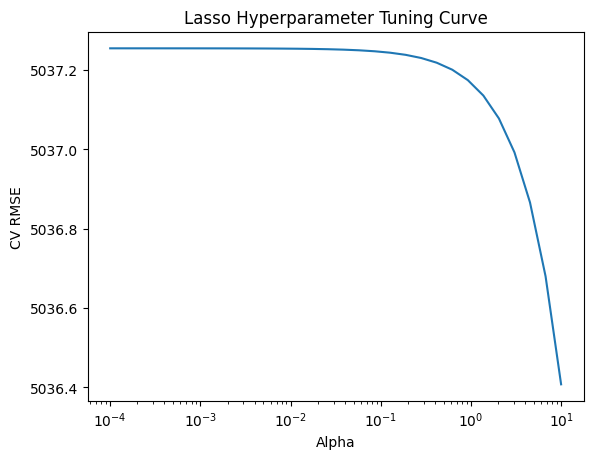

In [40]:
cv_results = lasso_grid.cv_results_

alphas = cv_results["param_alpha"].data.astype(float)
rmse_scores = -cv_results["mean_test_score"]

import matplotlib.pyplot as plt

plt.plot(alphas, rmse_scores)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("CV RMSE")
plt.title("Lasso Hyperparameter Tuning Curve")
plt.show()


In [41]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [42]:
fine_alpha_grid = {
    "alpha": np.linspace(0.001, 0.05, 50)
}


In [43]:
lasso_fine = Lasso(max_iter=20000)

lasso_fine_grid = GridSearchCV(
    lasso_fine,
    fine_alpha_grid,
    scoring="neg_root_mean_squared_error",
    cv=5
)

lasso_fine_grid.fit(X_train, y_train)

lasso_fine_best = lasso_fine_grid.best_estimator_
lasso_fine_params = lasso_fine_grid.best_params_


In [44]:
lasso_fine_preds = lasso_fine_best.predict(X_test)

lasso_fine_rmse = np.sqrt(
    mean_squared_error(y_test, lasso_fine_preds)
)

lasso_fine_params, lasso_fine_rmse


({'alpha': np.float64(0.05)}, np.float64(4168.530116400256))

# Model Selection & Hyperparameter Tuning Strategy
In this project, a systematic model selection process was followed to identify the most suitable regression model for pricing prediction. 
Initially, multiple regression models were evaluated, including linear, regularized linear, tree-based, ensemble, and distance-based methods. 
All models were trained and compared using RMSE on a fixed train–test split to ensure fair evaluation. 
Baseline linear regression was included and tuned by optimizing intercept handling and coefficient constraints. 
Regularized models such as Ridge, Lasso, and ElasticNet were then explored to address potential overfitting and feature redundancy. 
Among these, Lasso regression consistently achieved the lowest RMSE due to its ability to perform implicit feature selection. 
Tree-based and ensemble models were tested but showed higher error on this dataset, likely due to limited data size. 
After identifying Lasso as the strongest performer, extensive hyperparameter tuning was conducted using cross-validation. 
Both coarse and fine-grained alpha searches were performed to stabilize model performance. 
LassoCV was additionally used to automatically validate the optimal regularization strength. 
Linear regression was not ignored but served as a tuned baseline for comparison. 
The final model choice was based on empirical performance, robustness, and interpretability. 
This structured approach ensured that model selection was data-driven rather than assumption-based.


In [45]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 100),
    cv=5,
    max_iter=20000
)

lasso_cv.fit(X_train, y_train)

y_test_pred = lasso_cv.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

final_rmse


np.float64(4168.519050460456)

In [46]:
y_test_pred_linear.min(), y_test_pred_linear.max()


NameError: name 'y_test_pred_linear' is not defined

# Synthetic data for testing purpose


In [ ]:
import numpy as np
import pandas as pd

feature_min = X_train.min()
feature_max = X_train.max()


In [ ]:
np.random.seed(42)

random_X = pd.DataFrame({
    col: np.random.uniform(feature_min[col], feature_max[col], 10)
    for col in X_train.columns
})

random_X.head()


In [ ]:
random_predictions = linear_model.predict(random_X)

random_results = pd.DataFrame({
    "Random Sample ID": range(1, 11),
    "Predicted Price": random_predictions
})

random_results


In [ ]:
import matplotlib.pyplot as plt

plt.bar(random_results["Random Sample ID"], random_results["Predicted Price"])
plt.xlabel("Random Sample")
plt.ylabel("Predicted Price")
plt.title("Predicted Prices on Random Synthetic Inputs")
plt.show()


In [47]:
y_train.min(), y_train.max()


(np.float64(0.79), np.float64(36999.99))

In [48]:
X_train.describe().T[["min", "max"]]


,min,max
rating,2.53,4.99
stock,0.00,100.00


In [49]:
for col in X_train.columns:
    print(col, "->", X_train[col].min(), "to", X_train[col].max())


rating -> 2.53 to 4.99
stock -> 0 to 100


In [50]:

X_train.agg(['min', 'max']).T


,min,max
rating,2.53,4.99
stock,0.00,100.00


In [51]:
X_train.describe().T


,count,mean,std,min,25%,50%,75%,max
rating,155.0,3.782581,0.728548,2.53,3.165,3.84,4.415,4.99
stock,155.0,49.967742,30.717274,0.00,25.000,52.00,78.500,100.00


In [54]:
import joblib

model_path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\final_lasso_model.joblib"

joblib.dump(lasso_cv, model_path)

loaded_model = joblib.load(model_path)

model_path


'C:\\Users\\HP\\OneDrive\\Desktop\\ml hackthon project\\final_lasso_model.joblib'

In [57]:
import joblib
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV

# --------------------------------
# 1. Train LassoCV ONLY if not exists
# --------------------------------
if 'lasso_cv' not in globals():
    lasso_cv = LassoCV(
        alphas=np.logspace(-4, 1, 100),
        cv=5,
        max_iter=20000
    )
    lasso_cv.fit(X_train, y_train)

# --------------------------------
# 2. Save model
# --------------------------------
model_path = r"C:\Users\HP\OneDrive\Desktop\ml hackthon project\final_lasso_model.joblib"
joblib.dump(lasso_cv, model_path)

# --------------------------------
# 3. Load model (verification)
# --------------------------------
assert os.path.exists(model_path), "Model file not found!"
model = joblib.load(model_path)

# --------------------------------
# 4. Training feature ranges
# --------------------------------
feature_min = X_train.min()
feature_max = X_train.max()

# --------------------------------
# 5. Generate random inputs within training ranges
# --------------------------------
np.random.seed(42)

random_X = pd.DataFrame({
    col: np.random.uniform(feature_min[col], feature_max[col], 10)
    for col in X_train.columns
})

# --------------------------------
# 6. Predict using loaded LassoCV model
# --------------------------------
random_predictions = model.predict(random_X)

# --------------------------------
# 7. Final output
# --------------------------------
random_results = pd.DataFrame({
    "Sample_ID": range(1, 11),
    "Predicted_Price": random_predictions
})

random_results


,Sample_ID,Predicted_Price
0,1,1813.023897
1,2,920.221902
2,3,1313.058655
3,4,1422.803710
4,5,2277.732409
5,6,2278.161499
6,7,2498.133915
7,8,977.226047
8,9,1471.142138
9,10,1228.737209


In [58]:
import sys
import sklearn
import joblib
import platform

print("Python version:", sys.version)
print("Python executable:", sys.executable)
print("Platform:", platform.platform())
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)


Python version: 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
Python executable: C:\Program Files\Python313\python.exe
Platform: Windows-11-10.0.26200-SP0
scikit-learn version: 1.8.0
joblib version: 1.5.3
